<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [20]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
display(boston_df.head())
display(boston_df.tail())

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Data Description

The following describes the dataset variables:

| Variable|  Description |
|---|---|
|CRIM | per capita crime rate by town|
|ZN | proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS | proportion of nonretail business acres per town.|
|CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX | nitric oxides concentration (parts per 10 million)|
|RM | average number of rooms per dwelling|
|AGE | proportion of owneroccupied units built prior to 1940|
|DIS | weighted distances to five Boston employment centres|
|RAD | index of accessibility to radial highways|
|TAX | fullvalue propertytax rate per $10,000|
|PTRATIO| pupilteacher ratio by town|
|LSTAT | % lower status of the population|
|MEDV | Median value of owneroccupied homes in $1000's|

In [ ]:
display(boston_df.sample(n=10));
print('Size of sample and number of attributes',boston_df.shape)
display(boston_df.info())

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
365,365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,7.12,27.5
112,112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,16.21,18.8
261,261,0.53412,20.0,3.97,0.0,0.647,7.520,89.4,2.1398,5.0,264.0,13.0,7.26,43.1
419,419,11.81230,0.0,18.10,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,22.74,8.4
413,413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,20.08,16.3
145,145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,27.80,13.8
289,289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,9.51,24.8
348,348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,5.99,24.5
125,125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,14.81,21.4
364,364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,5.29,21.9


Size of sample and number of attributes (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


None

### Descriptive statistics table


In [ ]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# Medians values for the dataset
print('Medians:\n',boston_df.median())


Medians:
 Unnamed: 0    252.50000
CRIM            0.25651
ZN              0.00000
INDUS           9.69000
CHAS            0.00000
NOX             0.53800
RM              6.20850
AGE            77.50000
DIS             3.20745
RAD             5.00000
TAX           330.00000
PTRATIO        19.05000
LSTAT          11.36000
MEDV           21.20000
dtype: float64


### Some Histograms


Areas present a low percentage of crime rates


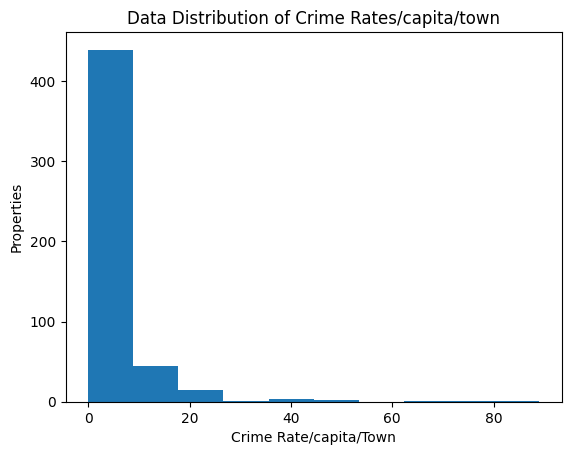



Around 27% have a high tax-rate, when compared with the rest of properties
The other 83% have are well distribuited between 200 and 400


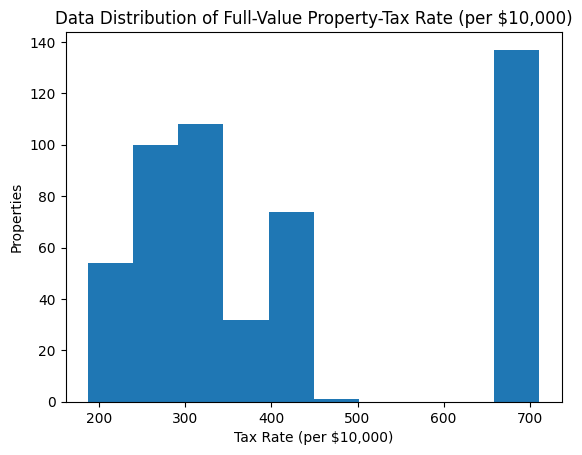



the MEDV shows a normal distribution with a mean value of 22.5


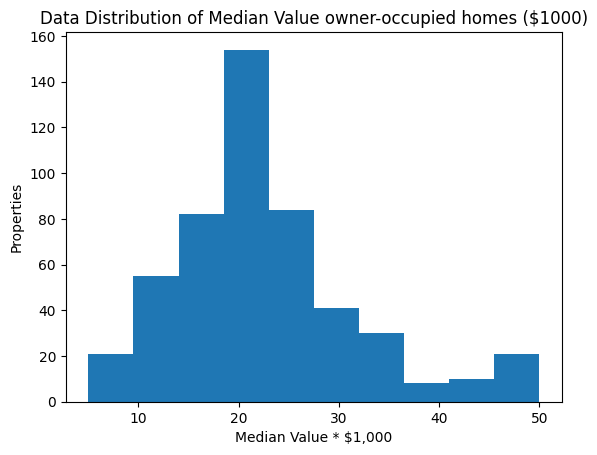

In [35]:

print('Areas present a low percentage of crime rates')
pyplot.hist(boston_df['CRIM'])
pyplot.title('Data Distribution of Crime Rates/capita/town')
pyplot.xlabel('Crime Rate/capita/Town')
pyplot.ylabel('Properties')
pyplot.show()

print('\n\nAround 27% have a high tax-rate, when compared with the rest of properties')
print('The other 83% have are well distribuited between 200 and 400')
pyplot.hist(boston_df['TAX'])
pyplot.title('Data Distribution of Full-Value Property-Tax Rate (per $10,000)')
pyplot.xlabel('Tax Rate (per $10,000)')
pyplot.ylabel('Properties')
pyplot.show()

print('\n\nthe MEDV shows a normal distribution with a mean value of 22.5')
pyplot.hist(boston_df['MEDV'])
pyplot.title('Data Distribution of Median Value owner-occupied homes ($1000)')
pyplot.xlabel('Median Value * $1,000')
pyplot.ylabel('Properties')
pyplot.show()


The Box plot shows a good normal distribution, with min-max values of around [5,25]
and a mean centered between 1st and 3rd quartile


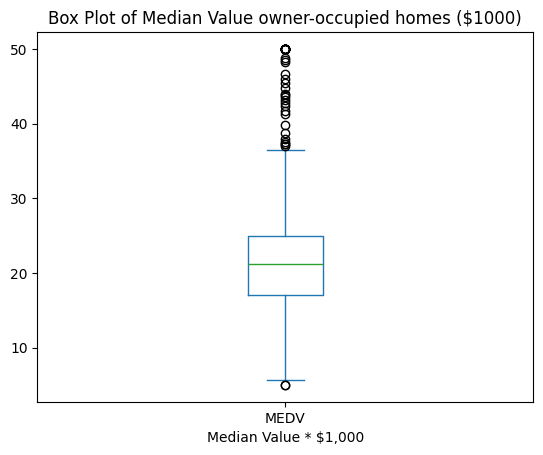

In [39]:
print('The Box plot shows a good normal distribution, with min-max values of around [5,25]')
print('and a mean centered between 1st and 3rd quartile')
boston_df['MEDV'].plot(kind='box')
pyplot.title('Box Plot of Median Value owner-occupied homes ($1000)')
pyplot.xlabel('Median Value * $1,000')
pyplot.show()


Less than 100 properties are bounded to the River


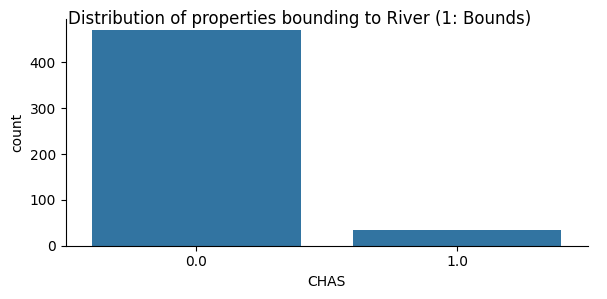

In [21]:
#Distribution of properties with the Charles River as Boundary
ax = sns.catplot(x='CHAS',
            kind='count', data=boston_df,
            height = 3, aspect = 2)
ax.figure.suptitle('Distribution of properties bounding to River (1: Bounds)')
print('Less than 100 properties are bounded to the River')

Box plot shows similar number of property-age within the 3 groups
Although there is a slightly trend of houses less than 35 yo


Text(0, 0.5, 'Median Value of Owner-Occupied Homes ($1000s)')

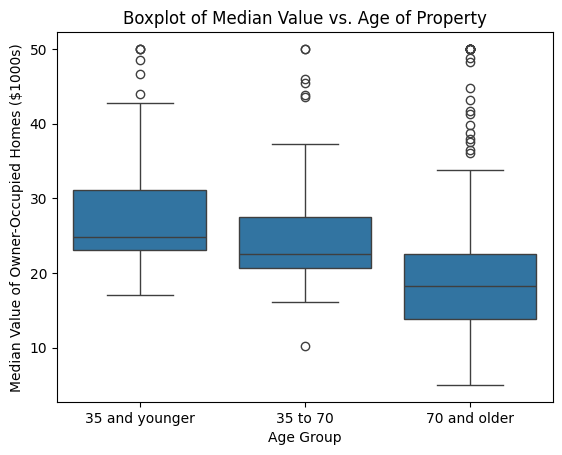

In [36]:
# Create age categories
#boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 and younger', '35 to 70', '70 and older'])
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_GROUP'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'AGE_GROUP'] = '35 to 70'
boston_df.loc[boston_df['AGE'] > 70, 'AGE_GROUP'] = '70 and older'

# Boxplot of MEDV vs. AGE_GROUP
print('Box plot shows similar number of property-age within the 3 groups')
print('Although there is a slightly trend of houses less than 35 yo')
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
ax.set_title('Boxplot of Median Value vs. Age of Property')
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Value of Owner-Occupied Homes ($1000s)')


This relation shows a linear relation between them
However, I would check the reason of the trend beyond 0.65NOS


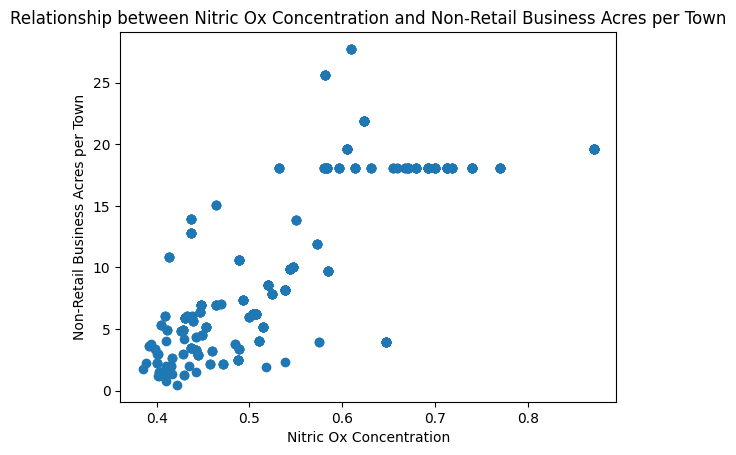

In [37]:
print('This relation shows a linear relation between them')
print('However, I would check the reason of the trend beyond 0.65NOS')
pyplot.scatter(boston_df['NOX'],boston_df['INDUS'])
pyplot.title('Relationship between Nitric Ox Concentration and Non-Retail Business Acres per Town')
pyplot.xlabel('Nitric Ox Concentration')
pyplot.ylabel('Non-Retail Business Acres per Town')
pyplot.show()


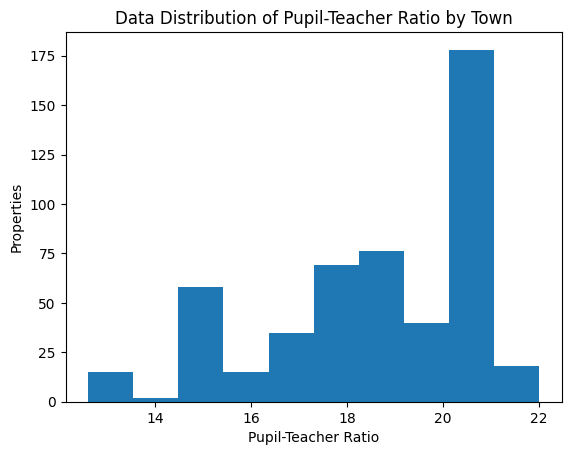

In [30]:

pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Data Distribution of Pupil-Teacher Ratio by Town')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Properties')
pyplot.show()

The Box plot shows a good normal distribution, with min-max values of around [5,25]
and a mean almost centered between 1st and 3rd quartile


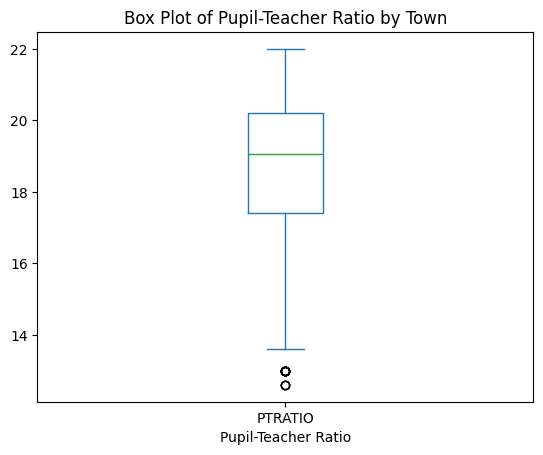

In [41]:
print('The Box plot shows a good normal distribution, with min-max values of around [5,25]')
print('and a mean almost centered between 1st and 3rd quartile')
boston_df['PTRATIO'].plot(kind='box')
pyplot.title('Box Plot of Pupil-Teacher Ratio by Town')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.show()

## Inferential Statistics
### T-Test: Using the boston's dataset,

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis
* $H_0: µ_1 = µ_2$ ("There is no difference in median values of houses bounded by the Charles River")
* $H_1: µ_1 ≠ µ_2$ ("There is a difference in median values of houses bounded by the Charles River")

<ipython-input-44-e786db4953d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

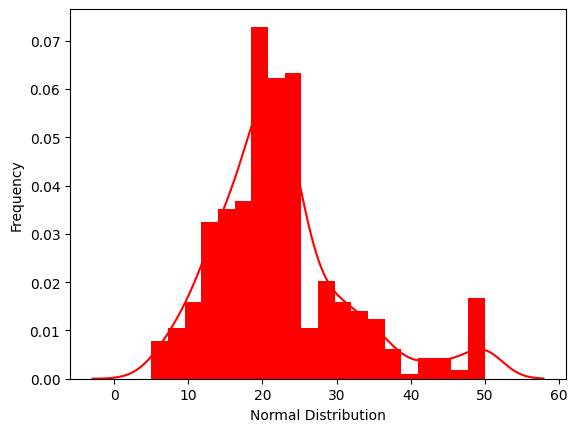

In [44]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

In [48]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

#since the p-value is smaller than 0.05 we can`t assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [51]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)
# Since p<0.05, we reject the Null Hypotesis, therefore, There is a difference in median values of houses bounded by the Charles River

TtestResult(statistic=3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that There is a statistical difference in median values of houses bounded by the Charles River.
Note that here we are not assuming equality of variance, as stated by levene test



# Inferential Statistics
### ANOVA Test: Using the boston's dataset

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ ("There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940")
* $H_1: µ_1 ≠ µ_2 ≠ µ_3$ ("There is a difference at least with one group of the  median values of houses for each proportion of owner occupied units built prior to 1940")
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


Test for equality of variance

In [52]:
boston_df['AGE_GROUP'].value_counts()

,count
AGE_GROUP,
70 and older,287
35 to 70,128
35 and younger,91


In [53]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '35 to 70']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV'],
                   center='mean')
# since the p-value is greater than 0.05, the variances are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [54]:
Y35_and_younger = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
Y35_to_70 = boston_df[boston_df['AGE_GROUP'] == '35 to 70']['MEDV']
Y70_and_older = boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']

In [55]:
f_statistic, p_value = scipy.stats.f_oneway(Y35_and_younger, Y35_to_70, Y70_and_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

There is a difference at least with one group of the median values of houses for each proportion of owner occupied units built prior to 1940


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:
* $H_0:$ N.O.C. is not correlated with non-retail business acres per town
* $H_1:$ N.O.C. is correlated with non-retail business acres per town

Text(0.5, 1.0, 'Relationship between NOX and Non-Retail Business Acres per Town')

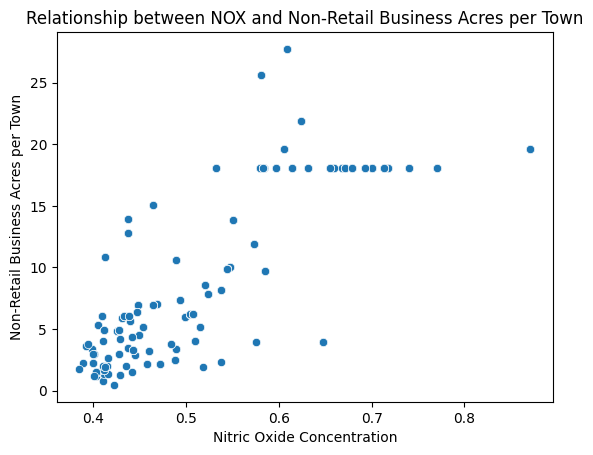

In [58]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town')
ax.set_title('Relationship between NOX and Non-Retail Business Acres per Town')


In [60]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and non-business retail acres per town.


# Inferential Statistics
### Regression Analysis: Using the boston's dataset

What is the impact of an additional weighted distance to the five Boston employment centres (RAD) on the median value of owner occupied homes (MEDV)? (Regression analysis)



Text(0.5, 1.0, 'Relationship between W-Dist to the Five Boston Employment Centres and Median Value of Owner-Occupied Homes')

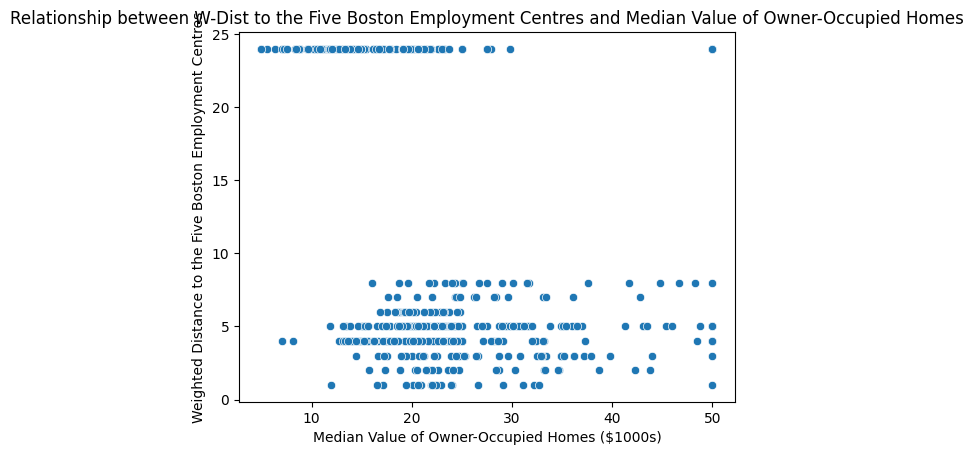

In [65]:
ax = sns.scatterplot(x="MEDV", y="RAD", data=boston_df)
ax.set(ylabel='Weighted Distance to the Five Boston Employment Centres', xlabel='Median Value of Owner-Occupied Homes ($1000s)')
ax.set_title('Relationship between W-Dist to the Five Boston Employment Centres and Median Value of Owner-Occupied Homes')

In [63]:
scipy.stats.pearsonr(boston_df['RAD'], boston_df['MEDV'])
#They are correlated (p<0.05)

PearsonRResult(statistic=-0.3816262306397781, pvalue=5.465932569648024e-19)

In [69]:
## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['RAD']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RAD   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           5.47e-19
Time:                        17:40:13   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6905      0.949     18.650      0.000      15.827      19.554
MEDV          -0.3613      0.039     -9.269      0.000      -0.438      -0.285
==============================================================================
Omnibus:                       58.235   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.063
Skew:                           0.844   Prob(JB):                     4.51e-15
Kurtosis:                       2.470   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since p < 0.05 there is an impact of an additional weighted distance to the five Boston employment centres (RAD) on the median value of owner occupied homes (MEDV).
